<a href="https://colab.research.google.com/github/mrrjew/KMeans-clustering/blob/main/Lab6_11225319.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder,StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt


In [33]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [34]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [35]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [37]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [38]:
df = df.drop('CustomerID',axis=1)

In [39]:
encoder = OneHotEncoder(drop='first',sparse_output=False)
gender = encoder.fit_transform(df[['Gender']])
df = pd.concat([df,pd.DataFrame(gender,columns=['Sex'])], axis=1)
df = df.drop('Gender',axis=1)
df

,Age,Annual Income (k$),Spending Score (1-100),Sex
0,19,15,39,1.0
1,21,15,81,1.0
2,20,16,6,0.0
3,23,16,77,0.0
4,31,17,40,0.0
...,...,...,...,...
195,35,120,79,0.0
196,45,126,28,0.0
197,32,126,74,1.0
198,32,137,18,1.0


In [40]:
scaled_columns = ['Age','Annual Income (k$)','Spending Score (1-100)']
scaler = StandardScaler()
df[scaled_columns] = scaler.fit_transform(df[scaled_columns])

In [41]:
x = df.drop('Spending Score (1-100)',axis=1)
y = df['Spending Score (1-100)']

In [42]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++', random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

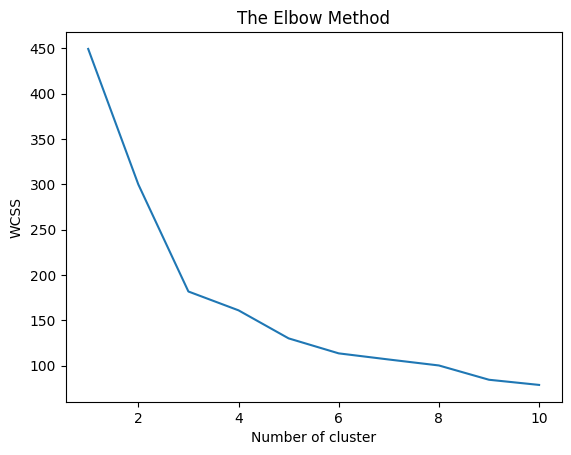

In [43]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

In [45]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k,init='k-means++',random_state=42)
kmeans.fit(x)

KMeans(n_clusters=4, random_state=42)

In [46]:
kmeans_labels = kmeans.labels_

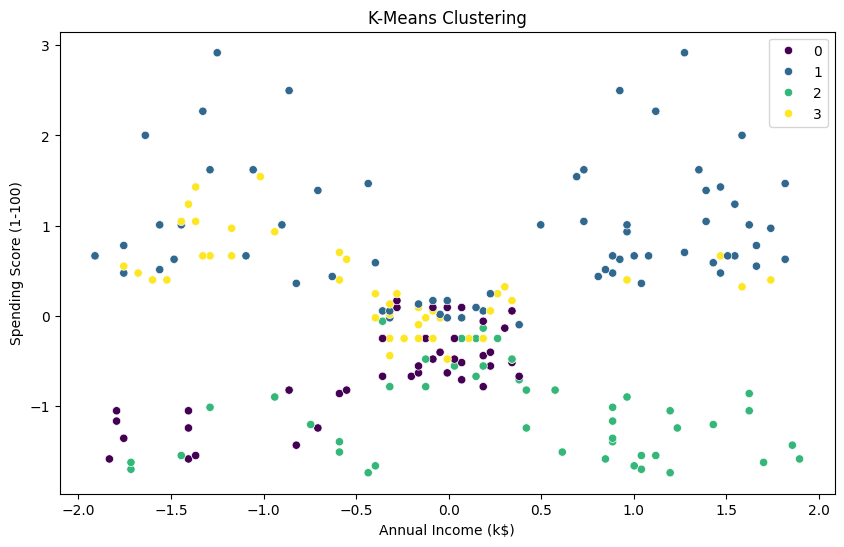

In [49]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Spending Score (1-100)'],y=df['Annual Income (k$)'],hue=kmeans_labels,data=df,palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

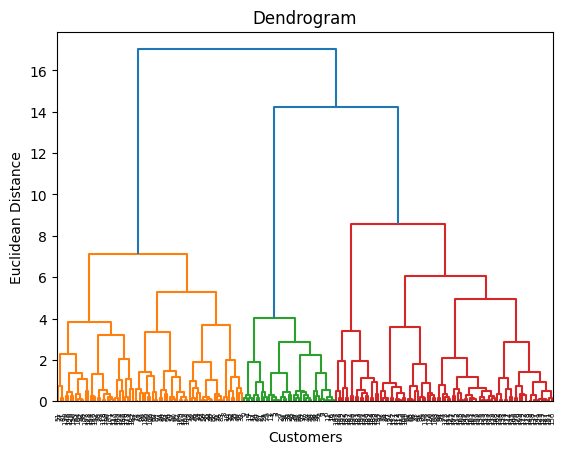

In [50]:
dendrogram = sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

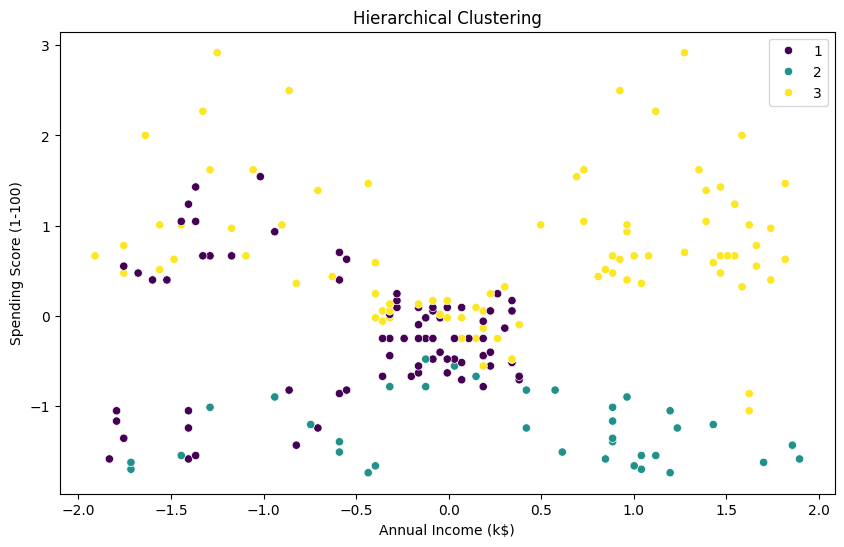

In [51]:
labels_hierarchical = sch.fcluster(sch.linkage(x,method='ward'),3,'maxclust')
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Spending Score (1-100)'],y=df['Annual Income (k$)'],hue=labels_hierarchical,data=df,palette='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [52]:
comparison = pd.DataFrame({'K-Means':kmeans_labels,'Hierarchical':labels_hierarchical})
comparison

,K-Means,Hierarchical
0,2,2
1,2,2
2,2,2
3,2,2
4,2,2
...,...,...
195,1,3
196,1,3
197,1,3
198,1,3


In [54]:
from sklearn.metrics import silhouette_score

slt_kmeans = silhouette_score(x,kmeans_labels)
print('K-Means Silhouette Score',slt_kmeans)
slt_hierarchical = silhouette_score(x,labels_hierarchical)
print('Silhouette Score', slt_hierarchical)

K-Means Silhouette Score 0.29203927860147055
Silhouette Score 0.3373726168939715


For this project, I used K-Means and hierarchical clustering to segment mall customers. K-Means gave a Silhouette Score of 0.292, and hierarchical clustering was a bit better with 0.337. Both methods helped split the customers into meaningful groups, with hierarchical clustering giving a slightly clearer picture. The visualizations made it easy to see the different segments based on spending patterns